# Generate learning curves on one plot

This plot is not used in the paper but just for case we decided to leave it here

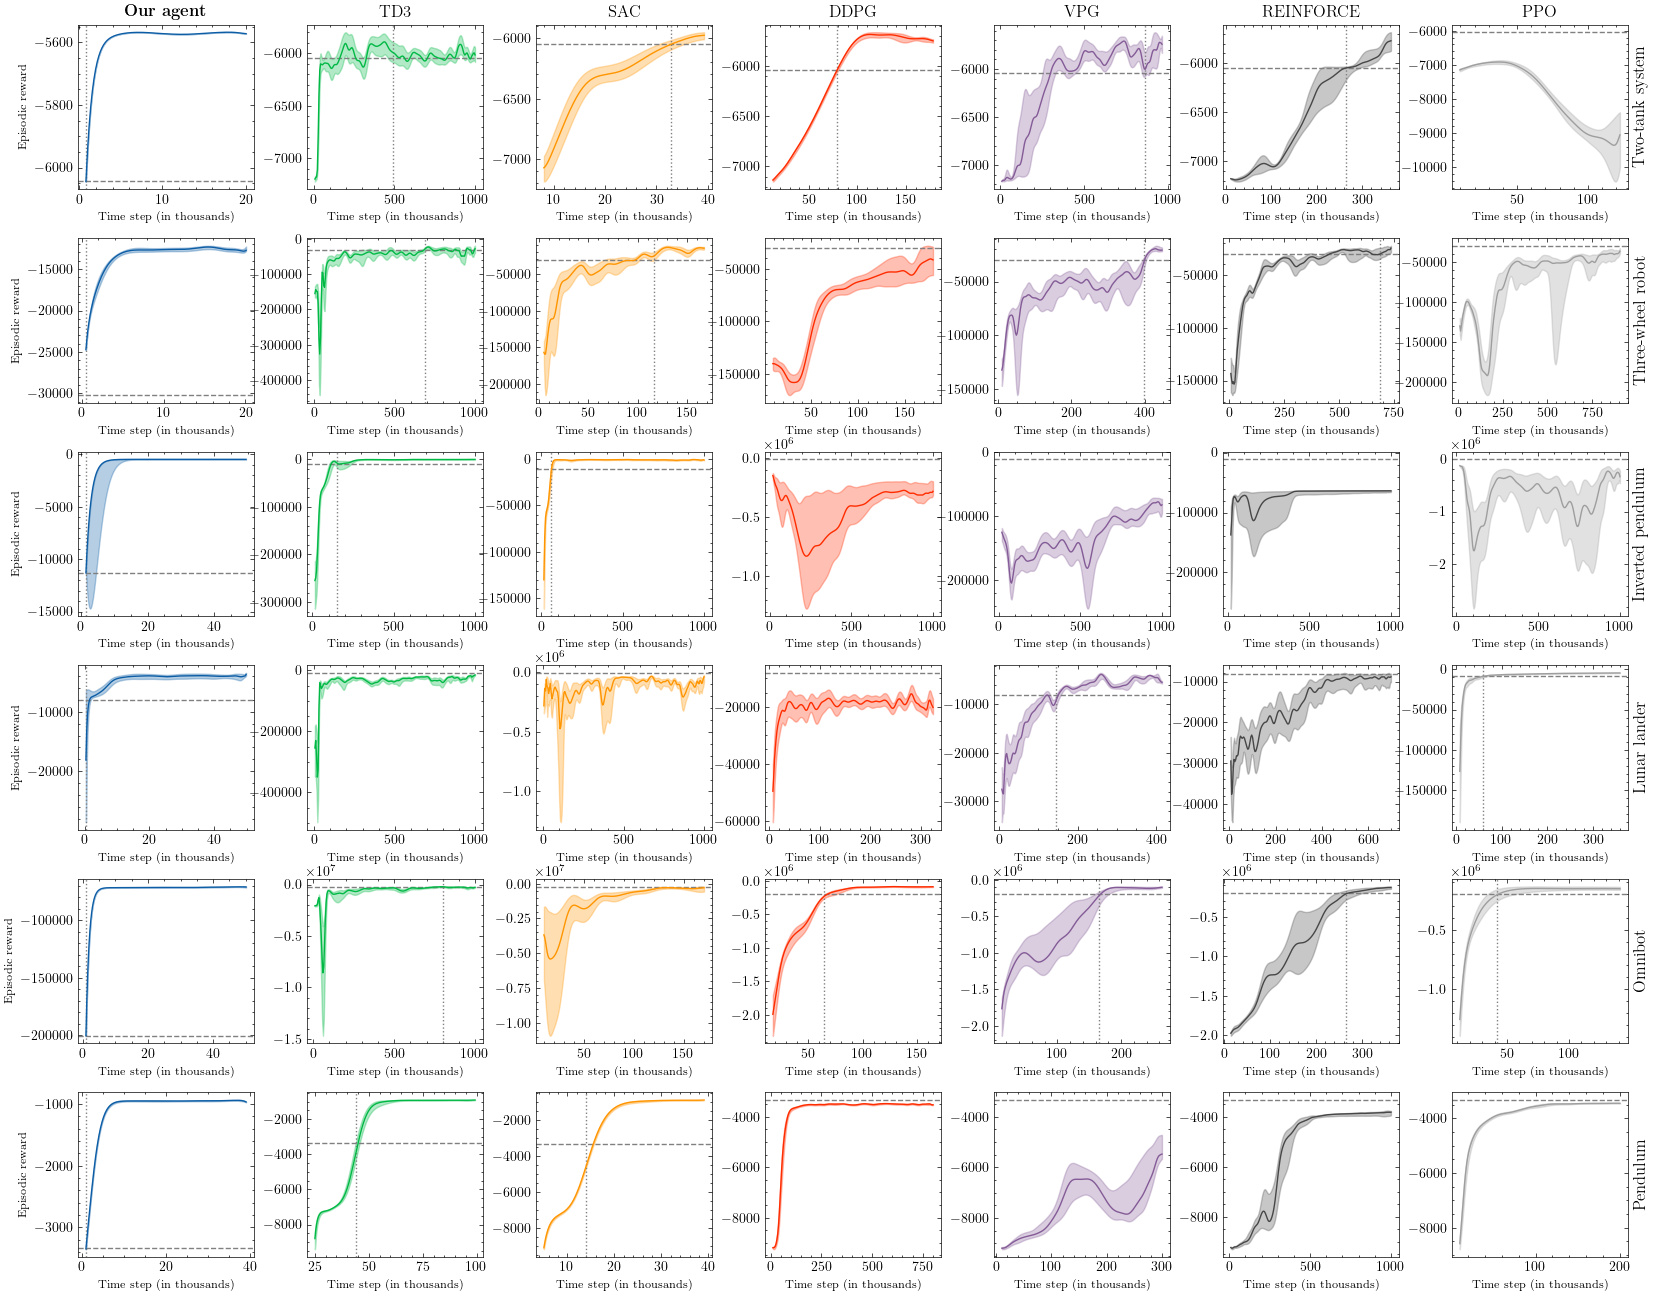

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scienceplots

plt.style.use("science")
agents = ["\\textbf{Our agent}", "TD3", "SAC", "DDPG", "VPG", "REINFORCE", "PPO"]
agents_ = ["calf", "td3", "sac", "ddpg", "vpg", "reinforce", "ppo"]
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
colors = dict(zip(agents, colors))
envs = [
    "Two-tank system",
    "Three-wheel robot",
    "Inverted pendulum",
    "Lunar lander",
    "Omnibot",
    "Pendulum",
]
envs_ = [
    "2tank",
    "3wrobot_kin",
    "inverted_pendulum",
    "lunar_lander",
    "omnibot",
    "pendulum",
]

fig, axes = plt.subplots(6, 7, gridspec_kw={"hspace": 0.3, "wspace": 0.3}, sharey=False)

fig.set_size_inches(20, 16)

for ax in axes.flatten():
    ax.set_xlabel("Time step (in thousands)", fontsize="small")

for ax in axes[:, 0]:
    ax.set_ylabel("Episodic reward", fontsize="small")


for i, ax in enumerate(axes[0, :]):
    ax.set_title(agents[i])

for i, ax in enumerate(axes[:, -1]):
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(
        envs[i],
        fontsize="large",
    )

from exman import utils
import omegaconf

source = Path("./plots")

plot_config = omegaconf.OmegaConf.load("exman/plot_config.yaml")
for i in range(len(agents_)):
    for j in range(len(envs_)):
        utils.plot_learning_curve(
            pd.read_hdf(source / f"{agents_[i]}_{envs_[j]}" / "raw_step_data.h5"),
            label=None,
            column="episodic_return",
            ax=axes[j, i],
            color=plt.rcParams["axes.prop_cycle"].by_key()["color"][i],
            **dict(plot_config[f"{agents_[i]}_{envs_[j]}"]),
        )

# Generate aggregated plots that start from nominal perfomance

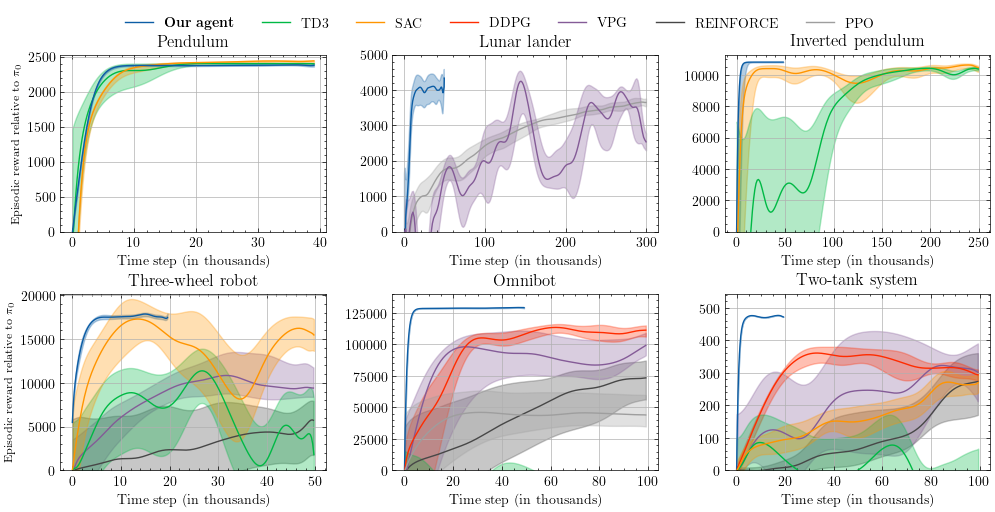

In [10]:
plot_config = omegaconf.OmegaConf.load("exman/main_body_plot_config.yaml")

fig, axes = plt.subplots(2, 3, gridspec_kw={"hspace": 0.35, "wspace": 0.25})

fig.set_size_inches(12, 5.4)
for ax in axes.flatten():
    ax.set_xlabel("Time step (in thousands)")
    ax.grid()
# fig.set_size_inches(13.3, 9)
axes[0, 0].set_ylabel("Episodic reward relative to $\\pi_0$", fontsize="small")
axes[1, 0].set_ylabel("Episodic reward relative to $\\pi_0$", fontsize="small")


env_axes = {
    "pendulum": axes[0, 0],
    "lunar_lander": axes[0, 1],
    "inverted_pendulum": axes[0, 2],
    "3wrobot_kin": axes[1, 0],
    "omnibot": axes[1, 1],
    "2tank": axes[1, 2],
}

env_axes["pendulum"].set_ylim(0, 3330 - 800)
env_axes["lunar_lander"].set_ylim(0, 8000 - 3000)
env_axes["inverted_pendulum"].set_ylim(0, 11308)
env_axes["3wrobot_kin"].set_ylim(0, 30_197 - 10000)
env_axes["omnibot"].set_ylim(0, +200400 - 60000)
env_axes["2tank"].set_ylim(0, -5500 + 6044)

env_axes["pendulum"].set_title("Pendulum")
env_axes["lunar_lander"].set_title("Lunar lander")
env_axes["inverted_pendulum"].set_title("Inverted pendulum")
env_axes["3wrobot_kin"].set_title("Three-wheel robot")
env_axes["omnibot"].set_title("Omnibot")
env_axes["2tank"].set_title("Two-tank system")

for item in plot_config:
    utils.plot_learning_curve(
        pd.read_hdf(source / item / "raw_step_data.h5"),
        column="episodic_return",
        ax=env_axes[item[item.find("_") + 1 :]],
        color=colors[plot_config[item].label],
        **dict(plot_config[item]),
    )

handles_labels_dict = {}
for ax in axes.flatten():
    handles, labels = ax.get_legend_handles_labels()
    handles_labels_dict |= dict(zip(labels, handles))
fig.legend(
    [handles_labels_dict[label] for label in colors],
    [label for label in colors],
    ncol=len(colors),
    loc=(0.12, 0.93),
    fontsize="medium",
)

fig.savefig(f"./plots/aggregated/learning_curves_from_nominal_perfomance.pdf")

# Generate learning curves per environment

There is no output for the cell, but result plots are saved inside `./plots/aggregated`

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scienceplots
import matplotlib.gridspec as gridspec


def swap_first_last(lst):
    if len(lst) > 1:  # Ensure the list has more than one element
        lst[0], lst[-1] = lst[-1], lst[0]
    return lst


plt.style.use("science")
agents = swap_first_last(
    ["\\textbf{Our agent}", "TD3", "SAC", "DDPG", "VPG", "REINFORCE", "PPO"]
)
agents_ = swap_first_last(["calf", "td3", "sac", "ddpg", "vpg", "reinforce", "ppo"])
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = swap_first_last(list(prop_cycle.by_key()["color"])[: len(agents)])
# colors = dict(zip(agents, colors))
envs = [
    "Two-tank system",
    "Three-wheel robot",
    "Inverted pendulum",
    "Lunar lander",
    "Omnibot",
    "Pendulum",
]
envs_ = [
    "2tank",
    "3wrobot_kin",
    "inverted_pendulum",
    "lunar_lander",
    "omnibot",
    "pendulum",
]

from exman import utils
import omegaconf

source = Path("./plots")

plot_config = omegaconf.OmegaConf.load("exman/plot_config.yaml")

for j in range(len(envs_)):
    fig = plt.figure(figsize=(12, 7))
    fig.subplots_adjust(top=0.8)
    spec = gridspec.GridSpec(ncols=19, nrows=3, figure=fig, wspace=0.7, hspace=0.5)
    axes = []
    axes.append(fig.add_subplot(spec[0, 1:6]))
    axes.append(fig.add_subplot(spec[0, 7:12]))
    axes.append(fig.add_subplot(spec[0, 13:18]))
    axes.append(fig.add_subplot(spec[1, 1:6]))
    axes.append(fig.add_subplot(spec[1, 7:12]))
    axes.append(fig.add_subplot(spec[1, 13:18]))
    axes.append(fig.add_subplot(spec[2, 7:12]))

    for ax in axes:
        ax.set_xlabel("Time step (in thousands)", fontsize="small")

    for i, ax in enumerate(axes[:4]):  # Titles for the top row
        ax.set_title(agents[i])
    for i, ax in enumerate(axes[4:]):  # Titles for the bottom row
        ax.set_title(agents[i + 4])

    axes[0].set_ylabel("Episodic reward", fontsize="small")
    axes[3].set_ylabel("Episodic reward", fontsize="small")
    axes[-1].set_ylabel("Episodic reward", fontsize="small")
    # axes[-1].yaxis.set_label_position("right")
    # axes[-1].set_ylabel(envs[j], fontsize="large")

    for i in range(len(agents_)):
        utils.plot_learning_curve(
            pd.read_hdf(source / f"{agents_[i]}_{envs_[j]}" / "raw_step_data.h5"),
            label=None,
            column="episodic_return",
            ax=axes[i],
            color=colors[i],
            **dict(plot_config[f"{agents_[i]}_{envs_[j]}"]),
        )

    handles_labels_dict = {}
    for ax in axes:
        ax.grid()
        handles, labels = ax.get_legend_handles_labels()
        handles_labels_dict |= dict(zip(labels, handles))
    fig.legend(
        handles_labels_dict.values(),
        handles_labels_dict.keys(),
        ncol=2,
        loc=(0.22, 0.9),
        fontsize="large",
        frameon=True,
    )

    # Save the figure for each environment
    # fig.suptitle(f"Learning curves for {envs[j].lower()}")
    plt.savefig(f"./plots/aggregated/learning_curves_{envs_[j]}.pdf")
    plt.close(fig)

# Generate from source the state-action trajectories


In [12]:
from exman import utils
from pathlib import Path

for p in Path("./plots").iterdir():
    if p.stem != "aggregated":
        agent = p.stem[: p.stem.find("_")]
        env = p.stem[p.stem.find("_") + 1 :]
        figure = utils.plot_episode(
            pd.read_hdf(p / "best_state_action_trajectory.h5"), agent, env
        )
        figure.savefig(p / "best_state_action_trajectory.pdf")
        plt.close(figure)